Run the following code to import the required packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In our previous case, there was only one dependent variable. If there is more than one, we might use multiple linear regression. Let's load in a simplified dataset of the car data located at http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data that contains only the numeric variables:

In [18]:
df = pd.read_csv('data/cars.csv', index_col=0)
df = df.drop(columns = 'make')
df.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Let's use pandas to check out the correlations between the different variables.

In [14]:
df.corr()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.879222,0.819009,0.592500,0.782720,0.569704,0.498228,0.171722,0.247730,0.375541,-0.352331,-0.499126,-0.566355,0.585793
length,0.879222,1.000000,0.858084,0.496218,0.881665,0.687479,0.609437,0.118664,0.160172,0.583813,-0.280986,-0.689660,-0.719324,0.695331
width,0.819009,0.858084,1.000000,0.315834,0.867315,0.740320,0.544311,0.186432,0.190997,0.616779,-0.251627,-0.647099,-0.692220,0.754273
height,0.592500,0.496218,0.315834,1.000000,0.307732,0.031286,0.189283,-0.055525,0.261160,-0.084412,-0.264078,-0.102367,-0.151188,0.138291
curb-weight,0.782720,0.881665,0.867315,0.307732,1.000000,0.857573,0.645806,0.172785,0.155382,0.760285,-0.278944,-0.772171,-0.812710,0.835729
engine-size,0.569704,0.687479,0.740320,0.031286,0.857573,1.000000,0.583091,0.211989,0.024617,0.842691,-0.219008,-0.710624,-0.732138,0.888942
bore,0.498228,0.609437,0.544311,0.189283,0.645806,0.583091,1.000000,-0.066793,0.003057,0.568527,-0.277662,-0.591950,-0.600040,0.546873
stroke,0.171722,0.118664,0.186432,-0.055525,0.172785,0.211989,-0.066793,1.000000,0.199882,0.100040,-0.068300,-0.027641,-0.036453,0.093746
compression-ratio,0.247730,0.160172,0.190997,0.261160,0.155382,0.024617,0.003057,0.199882,1.000000,-0.214401,-0.444582,0.331413,0.267941,0.069500
horsepower,0.375541,0.583813,0.616779,-0.084412,0.760285,0.842691,0.568527,0.100040,-0.214401,1.000000,0.105654,-0.834117,-0.812917,0.811027


Obviously, the correlation coefficient between a variable and itself is 1.

We notice that some of the variables (such as wheel-base and length) are highly correlated.  This is something we might want to take into consideration later.  When 2 predictor variables are highly correlated this is called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) and it is something we want to watch out for as it can destabilize our model.  In the extreme case, when 2 predictors are perfectly correlated then there is absolutely nothing gained by making both variables part of our regression.

Another thing we notice is that some variables are highly correlated with our target variable, price. We see that engine size and price are highly correlated (r=0.8889) whereas compression-ration and price are less so (0.0695). If we can only choose a few features to add to our model, we will probably prefer to choose those with the highest correlation. We can view the highest correlations to our target variable (price) by sorting them:

In [15]:
df.corr()['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.888942
curb-weight          0.835729
horsepower           0.811027
width                0.754273
length               0.695331
wheel-base           0.585793
bore                 0.546873
height               0.138291
stroke               0.093746
compression-ratio    0.069500
peak-rpm            -0.104333
city-mpg            -0.702685
highway-mpg         -0.715590
Name: price, dtype: float64

Remember that we also need to make sure that there is a linear relationship between the feature and the target variable, or else we might need to perform a transformation. Let's look at the shape of the scatterplots here:

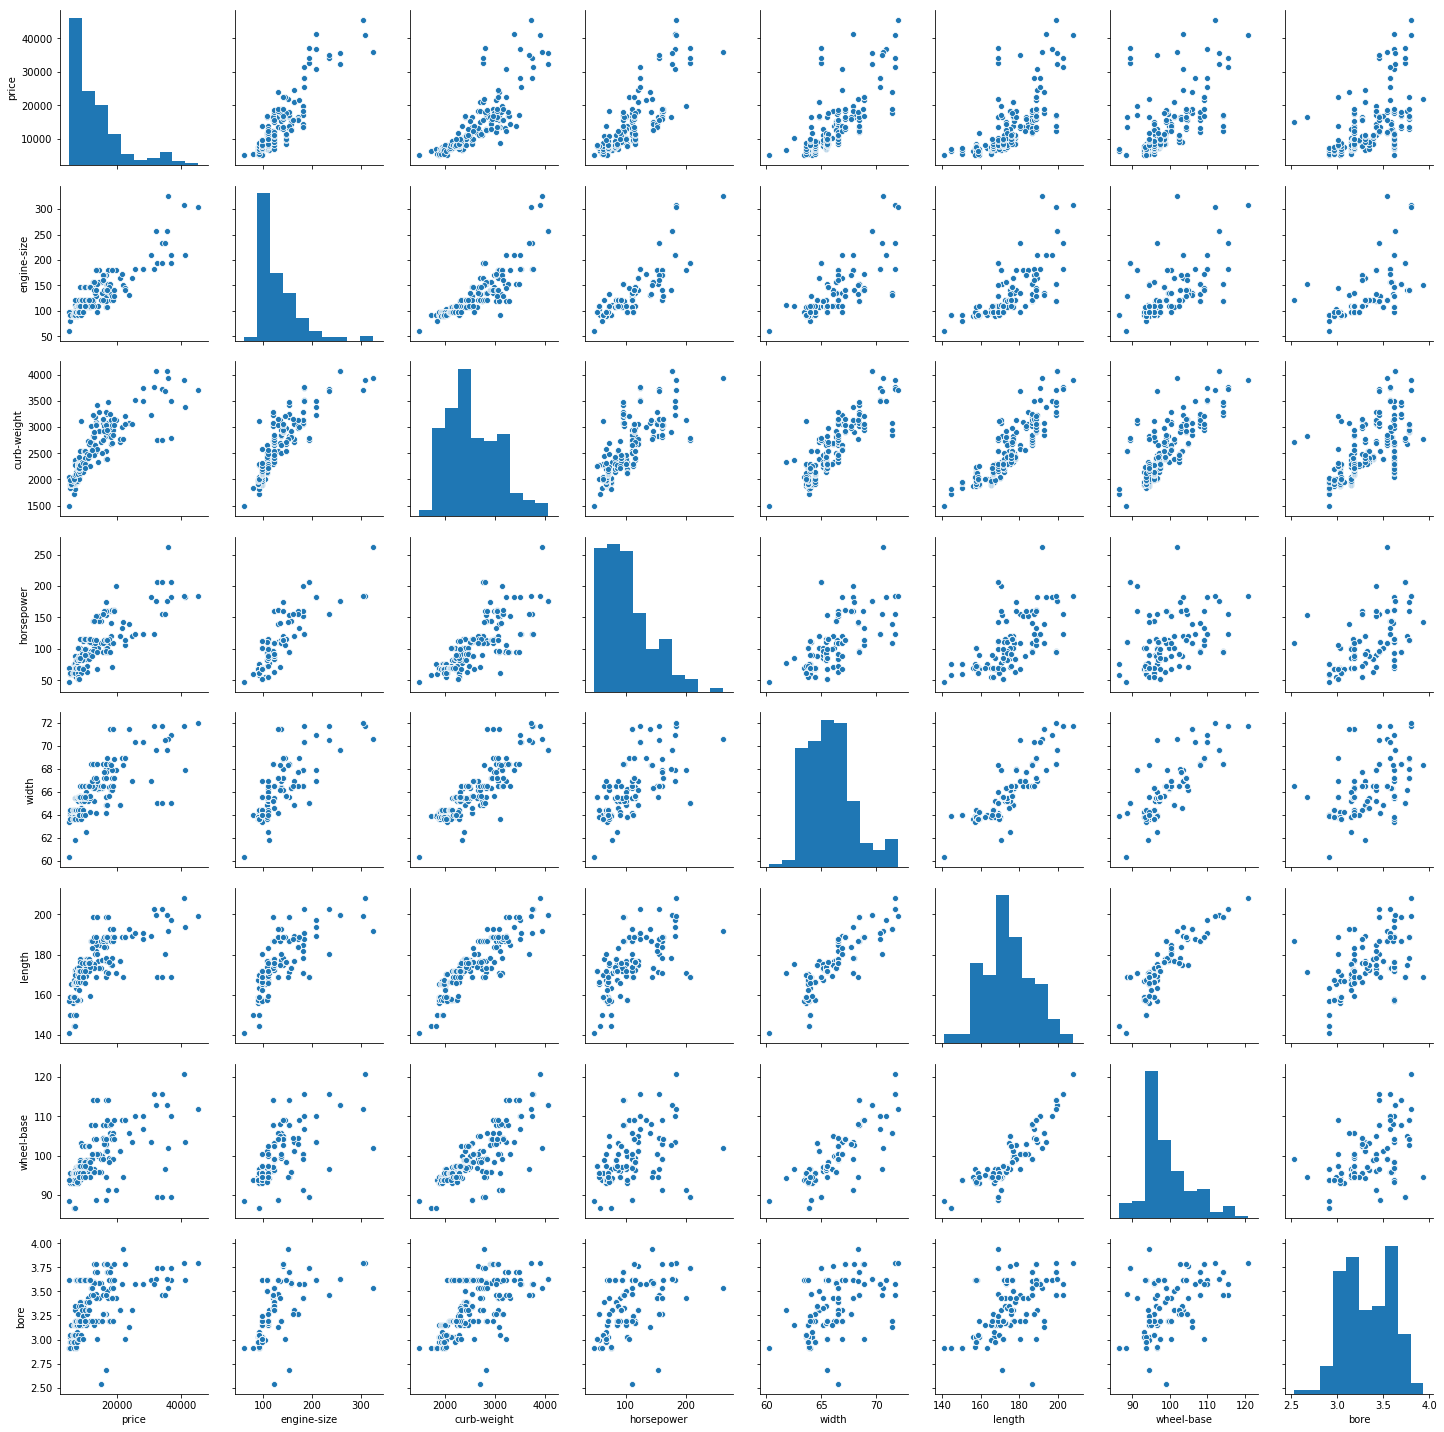

In [5]:
sns.pairplot(df[['price','engine-size', 'curb-weight', 'horsepower', 'width', 'length', 'wheel-base','bore']])

In [16]:
# Create an empty model
model = LinearRegression()
# Choose the response variable, which in this case is price
y = df['price']
# Choose the predictor variable, which in this case is all the other columns:
X=df.drop('price', axis=1)
# Fit the model to the full dataset
model.fit(X, y)
# print out intercept
print(model.intercept_)
# print out other coefficients
print(model.coef_)


ValueError: could not convert string to float: 'alfa-romero'

How we we interpret this? Our prediction for price is given by:
$$
Price = -62068.15 + 70.4671241*enginesize -80.97337480*curbweight +620.846258*horsepower + 319.938816*width + ...
$$

### Gradient Boosting

In [7]:
# Create an empty model
model = GradientBoostingRegressor()
# Choose the response variable, which in this case is price
y = df['price']
# Choose the predictor variable, which in this case is all the other columns:
X=df.drop('price', axis=1)
# Fit the model to the full dataset
model.fit(X, y)
# Score
print(model.score(X, y))

0.9923558195920876


### Ridge CV

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
model = RidgeCV(cv=10)
# Fit our model to the training data
model.fit(X_train, y_train)
print(model.score(X, y))

0.7344697894296944


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [2]:
### Categorical Variables

In [20]:
df = pd.read_csv('data/cars.csv', index_col=0)
subset=['make','price']
cars=df[subset]
cars['price']=cars['price'].replace('?',np.nan)
cars['price']=cars['price'].astype(float)
cars=cars.dropna()

cars.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0


In [21]:
print(df.make.value_counts())
print('\n')
print(len(df.make.value_counts()))

toyota           32
nissan           18
honda            13
mitsubishi       13
mazda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64


21


In [22]:
X = pd.get_dummies(cars['make'])
X.head()

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Create an empty model
model = LinearRegression()
# Choose the response variable, which in this case is price
y = cars['price']
# Fit the model to the full dataset
model.fit(X, y)
# print out intercept
print(model.intercept_)
# print out other coefficients
print(model.coef_)
print(model.score(X,y))

15306.378963959323
[  191.95436937  2552.78770271 10812.37103604 -9299.37896396
 -7430.93451951 -7121.68665627 -6389.87896396 19293.62103604
 -5381.84050242 18340.62103604  1196.62103604 -6066.60973319
 -4890.71229729   182.71194513 -7342.95039253 16094.12103604
   -83.04563063 -6765.12896396 -5420.56646396 -5228.87896396
  2756.80285422]
0.7985939160772452
